In [1]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\dda using python\data_csv/Reviews.csv")

In [3]:
df=df.head(100000)

In [4]:
df['TextLength'] = df['Text'].apply(lambda x: len(x)-x.count(' '))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,215
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,160
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,411
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,177
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,111


In [5]:
x=df['Text'].values[0]
x

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
x.count(' ')

48

In [7]:
len(x)

263

In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,TextLength
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,50000.500000,1.639790,2.119960,4.152630,1.296225e+09,360.025660
std,28867.657797,6.368915,6.991061,1.320141,4.782053e+07,364.777131
min,1.000000,0.000000,0.000000,1.000000,9.486720e+08,27.000000
25%,25000.750000,0.000000,0.000000,4.000000,1.270512e+09,149.000000
50%,50000.500000,0.000000,1.000000,5.000000,1.311725e+09,250.000000
75%,75000.250000,2.000000,2.000000,5.000000,1.332720e+09,437.000000
max,100000.000000,559.000000,562.000000,5.000000,1.351210e+09,14313.000000


In [9]:
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [10]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [11]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,TextLength
count,88461.000000,88461.000000,88461.000000,88461.000000,8.846100e+04,88461.000000
mean,48483.262104,1.646726,2.119216,4.150439,1.297145e+09,361.006941
std,28996.080863,6.448370,7.054204,1.317974,4.755788e+07,359.510065
min,1.000000,0.000000,0.000000,1.000000,9.486720e+08,27.000000
25%,22905.000000,0.000000,0.000000,4.000000,1.272413e+09,150.000000
50%,47768.000000,0.000000,1.000000,5.000000,1.312502e+09,252.000000
75%,73329.000000,2.000000,2.000000,5.000000,1.333152e+09,440.000000
max,100000.000000,559.000000,562.000000,5.000000,1.351210e+09,14313.000000


In [12]:
df[df['HelpfulnessDenominator']==0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,160
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,111
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,345
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,252
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,113
...,...,...,...,...,...,...,...,...,...,...,...
99913,99914,B004FHDNTY,A3SWCA2NEHRL0Z,XL,0,0,4,1349568000,Minty goodness,"My 70+ pound puppy loves this bone, and it's b...",322
99915,99916,B003SRSHNY,A2X26ATLQN6LZ2,Robert J Trader,0,0,5,1339632000,Amazing!,I ordered this product last September (the 6-p...,600
99916,99917,B000UYIQHK,A2PMV21JFDKJIU,shopAholic,0,0,5,1330387200,MUST HAVE FOR GLUTEN FREE COOKS,"I like to cook, but a gluten free diet is defi...",410
99917,99918,B0088C8QOE,A2Y3PY3XIIK56G,PamL,0,0,1,1349395200,"Great Cake, Crappy Price",Great cake but 14.00 for a cake you shouldbe a...,105


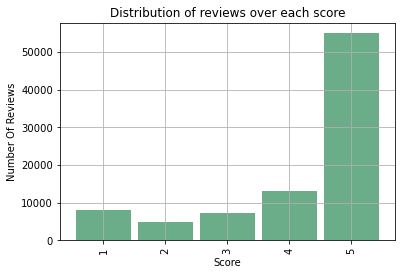

In [13]:
df.Score.value_counts().sort_index().plot.bar(alpha=0.7, grid=True, color = 'seagreen', width = 0.9)
plt.xlabel('Score')
plt.ylabel('Number Of Reviews')
plt.title('Distribution of reviews over each score')
plt.show()

In [14]:
df.Score.value_counts().sort_index()

1     8177
2     4971
3     7202
4    13128
5    54983
Name: Score, dtype: int64

In [15]:
df[df['TextLength']==0].Text.count()

0

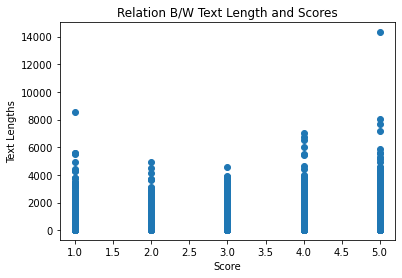

In [16]:
plt.scatter(df['Score'], df['TextLength'])
plt.xlabel('Score')
plt.ylabel('Text Lengths')
plt.title('Relation B/W Text Length and Scores')
plt.show()

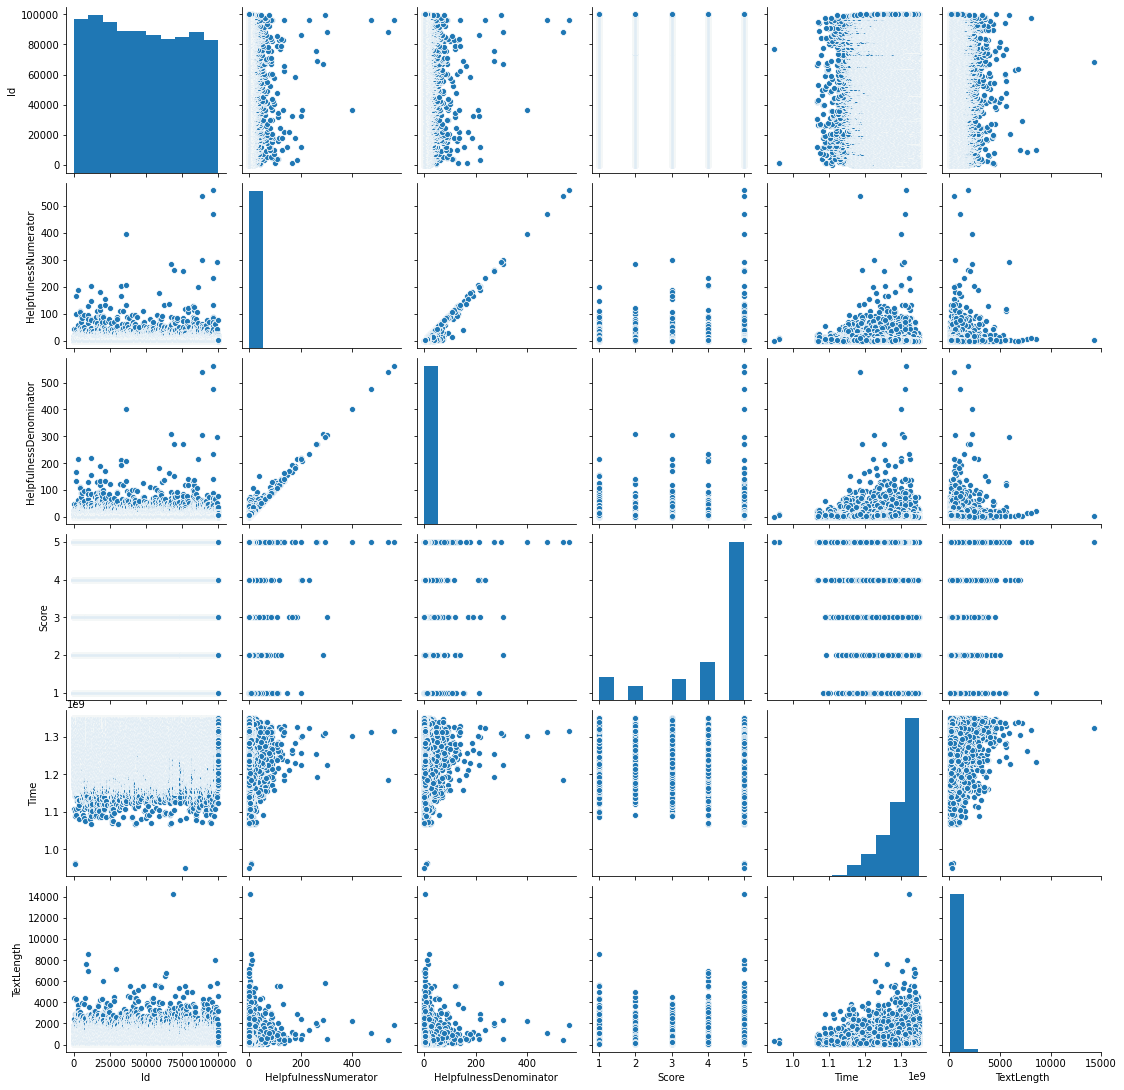

In [17]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [18]:
stop = set(stopwords.words('english')) 
import string

In [19]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
from nltk import word_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91769\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import re
from nltk.stem import PorterStemmer
snow = nltk.stem.SnowballStemmer('english')
def clean_text(text):
    text = text.lower() #converting text to lowercase
    text = ' '.join([i for i in nltk.word_tokenize(text) if i not in stop and i not in string.punctuation]) #stopword and punct removal
    text = re.sub('[^a-z]+', ' ', text) #removal of anything other than English letters
    text = ' '.join([snow.stem(i) for i in nltk.word_tokenize(text)]) #stemming
    return text

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
df['CleanText'] = df['Text'].apply(lambda x: clean_text(x))
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength,CleanText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,215,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,160,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,411,confect around centuri light pillowi citrus ge...


In [25]:
def partition(val):
    if(val>2):
        return 1
    return 0
df['Positivity']=df['Score'].apply(lambda x: partition(x))
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength,CleanText,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,215,bought sever vital can dog food product found ...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,160,product arriv label jumbo salt peanut peanut a...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,411,confect around centuri light pillowi citrus ge...,1


In [26]:
required_columns = ['CleanText', 'Positivity']
df = df[required_columns]
df.head()

,CleanText,Positivity
0,bought sever vital can dog food product found ...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,confect around centuri light pillowi citrus ge...,1
3,look secret ingredi robitussin believ found go...,0
4,great taffi great price wide assort yummi taff...,1


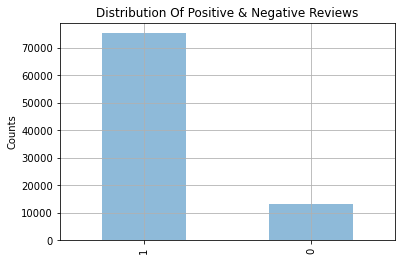

In [27]:
df.Positivity.value_counts().plot.bar(alpha=0.5, grid=True)
plt.title('Distribution Of Positive & Negative Reviews')
plt.ylabel('Counts')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['CleanText'], df['Positivity'], test_size=0.25, random_state=42, shuffle=True, stratify=df['Positivity'])
print("Dataset Splitted ... \nTrain Set Size = {}\nTest Set Size  = {}".format(X_train.shape[0], X_test.shape[0]))

Dataset Splitted ... 
Train Set Size = 66345
Test Set Size  = 22116


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()

In [30]:
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((66345, 31879), (22116, 31879))

In [31]:
import random
print("Ten Random Words from Training Set ...\n",*random.sample(tfidf_vectoriser.get_feature_names(),10))

Ten Random Words from Training Set ...
 storein portablt concerntr amo craftmanship overdraft brough coldpress chain drumrol


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()

# Training % Feature Extraction On Entire Dataset, Used For Cross Validation & Model Comparison
features = tfidf_vectoriser.fit_transform(df['CleanText'])
labelss = df['Positivity'].astype(int)

In [34]:
models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features ,labelss, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [35]:
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.902334
1,LinearSVC,1,0.903516
2,LinearSVC,2,0.904929
3,LinearSVC,3,0.901537
4,LinearSVC,4,0.899220
5,MultinomialNB,0,0.853671
6,MultinomialNB,1,0.853606
7,MultinomialNB,2,0.853889
8,MultinomialNB,3,0.852871
9,MultinomialNB,4,0.853380


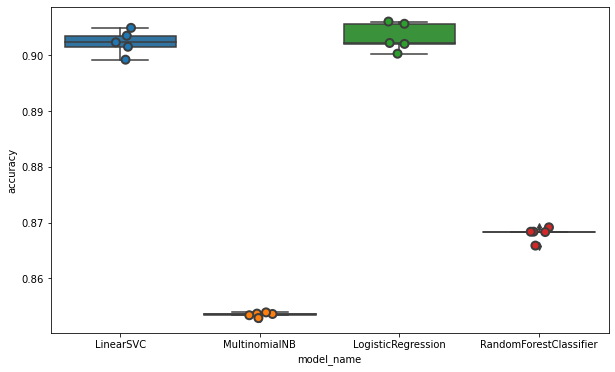

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0,1.5]
}
svm = LinearSVC(max_iter=1500)
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(features, labelss)
print("Best Parameters :", svm_cv.best_params_)
print("Best Score :",svm_cv.best_score_)

Best Parameters : {'C': 0.5}
Best Score : 0.9046924503903776


In [38]:
svm = LinearSVC(C=0.5, max_iter=2000)
svm.fit(X_train_tf, y_train)

LinearSVC(C=0.5, max_iter=2000)

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = svm.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("Accuracy :",accuracy_score(y_test, y_pred), end='\n\n')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

    Negative       0.76      0.54      0.63      3287
    Positive       0.92      0.97      0.95     18829

    accuracy                           0.91     22116
   macro avg       0.84      0.75      0.79     22116
weighted avg       0.90      0.91      0.90     22116

Accuracy : 0.9063573883161512

[[ 1761  1526]
 [  545 18284]]


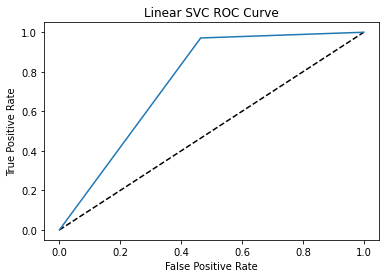

ROC AUC Score : 0.7534010843561019


In [40]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Linear SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVC ROC Curve')
plt.show();
print("ROC AUC Score :", roc_auc_score(y_test, y_pred))

In [41]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0,1.5], 'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto']
}
svm = SVC(max_iter=1500)
svm_cv = GridSearchCV(svm, param_grid, cv=10)
svm_cv.fit(features, labelss)
print("Best Parameters :", svm_cv.best_params_)
print("Best Score :",svm_cv.best_score_)

In [ ]:
svm = SVC(C=0.5, max_iter=2000)
svm.fit(X_train_tf, y_train)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = svm.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("Accuracy :",accuracy_score(y_test, y_pred), end='\n\n')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)